In [ ]:
# <code><script>
# var myUrl = 'https://learnmachinelearning.wordpress.com/2017/04/03/image-compression-using-kmeans/';
 
# if(window.top.location.href !== myUrl) {
#     window.top.location.href = myUrl;
# }
# </script></code>

Importing Libraries such as matplotlib , nupmy , openCV (cv2) , and sklearn-Kmeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import cv2

from sklearn.cluster import KMeans

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Deciding No. of colors 

In [2]:
no_of_color = 24


Reading the image

In [3]:
im = cv2.imread('./test1.png')

Converting to BGR color scheme since , matplot supports BGR and openCV gives RGB

In [4]:
# assert type(im) is not type(im)
print type(im)
im = cv2.cvtColor(im , cv2.COLOR_RGB2BGR)

<type 'numpy.ndarray'>


In [8]:
print im.shape

(1600, 2560, 3)


Scaling down the image size so as to reduce computation time. Although reduction of size will reduce the image size but this is not the aim of this project. We are scaling down the image size ONLY to reudce the computation time , which will be very high for 1660 x 2560 size of image. So we scale down 1600 to 480 and reduce 2560 accordingly bt the same ratio.


In [9]:
y = im.shape[0]
x = im.shape[1]
print x , y
x = int(x*480/float(y))
y = 480
print x , y

2560 1600
768 480


In [10]:
# to make y = 480 , so we divide x by y and multiply by 480

Plotting the Original Loaded Image.

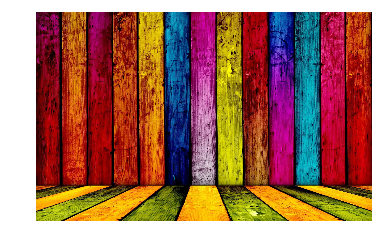

In [11]:
plt.figure(0)
plt.imshow(im)
plt.axis('off')
plt.show()

Image dimension for Passport size image.

In [12]:
# imgdash = cv2.resize(im,(413,531))

Resizing image to the required dimensions.

In [13]:
# change to y=480
img = cv2.resize(im , (x,y))


#chnage to 480p
# img = cv2.resize(im , (640,480))
#change to passport size
# img = cv2.resize(im,(413,531))
#original 
# img = im

Printing the shapes of both the original loaded image and the resized image. Now our resized image is the original image and our TASK : is to reduce the image size of this obtained resized image.

In [14]:
print im.shape
print img.shape

(1600, 2560, 3)
(480, 768, 3)


Converting to linear image vector.

In [15]:
img_vec = img.reshape((img.shape[0]*img.shape[1] , img.shape[2]))
print img_vec.shape

(368640, 3)


Initialising the sklearn KMeans and fitting the image vector img_vec

In [16]:
km = KMeans(n_clusters=no_of_color ,  max_iter=500)
km.fit(img_vec)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
    n_clusters=24, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Plotting the resized image

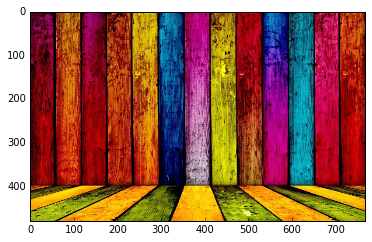

In [17]:
plt.figure(10)
plt.imshow(img)
plt.show()

We now subtract the labels colors from 255 (else the image becomes the negative of what we require.)
Conversion to uint8 converts all the floating point values in the cluster centre to integer values
We then make boxes of size 20,20,3 and assign in each box the color values of cluster centre and display so as to visualize the dominant colors extracted from the image.

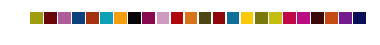

In [18]:
colors = 255  - km.cluster_centers_.astype("uint8")
# print colors[1]
# f = np.zeros((20, 20, 3))
# print f.shape
# f[:,:,:] = colors[1]
# print f
plt.figure(0)
for cols in range(colors.shape[0]):
    cl = np.zeros((900, 900, 3)) 
#     box of 20,20 will be shown
    cl[:, :, :] = colors[cols]
#     print cl
    plt.subplot(1, no_of_color, cols+1)
    plt.axis("off")
    plt.imshow(cl)
plt.show()

Create an empty new_im , and for each pixel in the image we find the label corresponding to the color value of that pixel and assign the cluster label color to it. This is the compression Step.

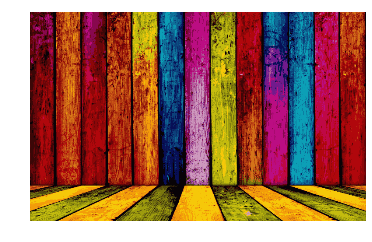

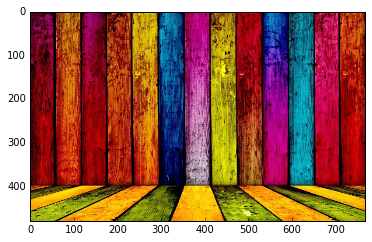

True

In [20]:
new_im = np.zeros((img_vec.shape))

for ix in range(new_im.shape[0]):
    new_im[ix, :] = colors[km.labels_[ix]]

new_im = new_im.reshape(img.shape)

plt.figure(0)
plt.axis("off")
new_im = 255 - new_im.astype('uint8')
plt.imshow(new_im)
plt.show()
new_im = cv2.cvtColor(new_im , cv2.COLOR_BGR2RGB)
# new_im = cv2.resize(new_im,(640,480))
cv2.imwrite('compress.png' , new_im)

# new_im = cv2.cvtColor(new_im , cv2.COLOR_BGR2RGB)
# cv2.imwrite('compress.jpeg' , new_im)
# plt.savefig('./adsf.png')

plt.figure(1)
# im_480 = cv2.resize(im, (640,480))
im_480 = cv2.resize(im,(x,y))
plt.imshow(im_480)
plt.show()
im_480 = cv2.cvtColor(im_480 , cv2.COLOR_BGR2RGB)
cv2.imwrite('test1_480.png' , im_480)

Calculation of pixel to pixel loss

In [21]:
def calc_loss(originalpath , compressedpath) :
    oimg = cv2.imread(originalpath)
    cimg = cv2.imread(compressedpath)
    print 'Original Image Shape ',oimg.shape
    print 'Compressed Image Shape ',cimg.shape
    
    loss = 0
    
    for px in range(oimg.shape[0]) :
        for py in range(oimg.shape[1]) :
            l =0
            for c in range(3) :
                l += (cimg[px,py,c] - oimg[px,py,c])
            loss += l/3
    print oimg.shape[0]*oimg.shape[1]
    loss = (loss*100)/float(oimg.shape[0]*oimg.shape[1]*255)
    return loss

In [22]:
calc_loss('./test1_480.png' , './compress.png')

Original Image Shape  (480, 768, 3)
Compressed Image Shape  (480, 768, 3)


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: overflow encountered in ubyte_scalars


368640


43.607511233660134